In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

In [378]:
def get_gradient(X, d):
    grad = []
    for i in range(X.shape[0]):
        x_vec = X[i]
        X_temp = np.array(X, copy=True)
        X_temp = X_temp - x_vec
        norm = np.linalg.norm(X_temp, axis = 1).reshape(X.shape[0], 1)
        #second_term = (X_temp/(norm*d[i].reshape(X.shape[0],1)))
        second_term = (X_temp/(norm))
        second_term[np.isnan(second_term)] = 0
        second_term = second_term * d[i].reshape(X.shape[0],1)
        #first_term = 2 *(norm/(d[i].reshape(X.shape[0],1))**2)
        first_term = -2 *(X_temp)
        #first_term[np.isnan(first_term)] = 0
        #print(first_term)
        temp_grad = first_term + (2 * second_term)
        grad.append(np.sum(temp_grad, axis=0))
    return(np.array(grad))

In [394]:
def findgradient(X,d):
    
    X_i = X[:,np.newaxis]
    X_j = X_i.transpose(1,0,2)
    X_ij = X_i - X_j
#     print("shape of Xij is {}".format(X_ij.shape))
    
    X_ij_norm = np.linalg.norm(X_ij, axis = 2)
    X_ij_norm = X_ij_norm.reshape(X_ij_norm.shape[0],X_ij_norm.shape[1],1)
    X_ij_norm = np.concatenate((X_ij_norm,X_ij_norm),axis=2)
#     print("shape of X_ij_norm is {}".format(X_ij_norm.shape))
    
    first_term = 2*X_ij
#     print("d shape is {}".format(d.shape))
    
    d = d.reshape(d.shape[0],d.shape[1],1)
    d_matrix = np.concatenate((d,d), axis=2)
#     print("shape of d is {}".format(d_matrix.shape))
    
    second_term = (2*d_matrix*X_ij)/X_ij_norm
    second_term[np.isnan(second_term)] = 0
#     print("second_term is {}".format(second_term))
    
    grad_ij = first_term - second_term
#     print("shape of grad_ij is {}".format(grad_ij.shape))
    grad_i = 2*np.sum(grad_ij, axis=0)
#     print("grad_i is {}".format(grad_i))
    
    return grad_i
    
    

In [263]:
def get_loss(X,d):
    X_i = X[:,np.newaxis]
    X_j = X_i.transpose(1,0,2)
    X_ij = X_i - X_j
    X_ij_norm = np.linalg.norm(X_ij,axis=2)
    #print("X_ij_norm is {}".format(X_ij_norm))
    X_ij_diff = (X_ij_norm-d)
    total_loss = np.linalg.norm(X_ij_diff)
    
    return total_loss
    

In [264]:
def get_batches(X,b,d):
    X_len = X.shape[0]
    batch_indices = np.array_split(np.arange(X_len),b)
    batches = []
    dist = []
    batch_index =[]
    for i in batch_indices:
        batch_indices = list(i)
#         print("batch indices is {}".format(batch_indices))
        batches.append(X[batch_indices,:])
        dist_b = d[np.ix_(batch_indices,batch_indices)]
        dist.append(dist_b)
        batch_index.append(batch_indices)
        
#         print("batch is {}".format(X[batch_indices]))
#         print("batch is {}".format(type(X[batch_indices])))
#         print("batch indices: {}".format(batch_indices))
#         print("dist is {}".format(dist_b))
        
    
        
    return (batches,dist,batch_index)

In [391]:
batch_grad

array([[ 5.44275736e-12, -4.26325641e-12],
       [ 5.37525580e-12, -3.80850906e-12],
       [ 4.76063633e-12, -1.47792889e-12],
       [-1.04591891e-11, -3.06954462e-12],
       [-1.70530257e-12,  4.20641300e-12],
       [ 0.00000000e+00, -5.17275112e-12],
       [ 1.00044417e-11, -9.49285095e-12],
       [ 6.02540240e-12,  3.80850906e-12],
       [-1.94404493e-11,  1.92699190e-11]])

In [427]:
d = np.array([[0,206,429,1504,963,2976,3095,2979,1949],
[206,0,233,1308,802,2815,2934,2786,1771],
[429,233,0,1075,671,2684,2799,2631,1616],
[1504,1308,1075,0,1329,3273,3053,2687,2037],
[963,802,671,1329,0,2013,2142,2054,996],
[2976,2815,2684,3273,2013,0,808,1131,1307],
[3095,2934,2799,3053,2142,808,0,379,1235],
[2979,2786,2631,2687,2054,1131,379,0,1059],
[1949,1771,1616,2037,996,1307,1235,1059,0]])

#np.random.seed(seed = 11)
X = np.random.random((9,2))
learning_rate = 0.001
epoch_loss_dict = {}
epoch = 0
#error = 100000
while epoch < 10000:
    epoch += 1
    batch_grad = get_gradient(X, d)
    #batch_grad = findgradient(X, d)
#     if batch_grad.all() == 0:
#         print("cant update")
#         break
    X = X- (learning_rate * batch_grad)
    loss = get_loss(X,d)
    epoch_loss_dict[epoch] = loss
    print("loss is {}".format(loss))

/Users/divyahindupur/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


loss is 16771.04054288815
loss is 16571.620224530776
loss is 16372.488343099585
loss is 16174.207689477316
loss is 15976.775955895986
loss is 15780.529512850795
loss is 15586.095975518047
loss is 15394.076171994113
loss is 15204.916536172965
loss is 15018.9174574363
loss is 14836.27253682748
loss is 14657.102486617803
loss is 14481.478689325253
loss is 14309.43870119054
loss is 14140.996411838687
loss is 13976.148798178943
loss is 13814.88050943799
loss is 13657.1670511819
loss is 13502.977046081776
loss is 13352.27387295605
loss is 13205.0168780694
loss is 13061.16228608087
loss is 12920.663896048034
loss is 12783.473620895764
loss is 12649.54191105129
loss is 12518.818091110054
loss is 12391.250630337547
loss is 12266.787362230185
loss is 12145.375664428457
loss is 12026.962607467272
loss is 11911.49507881273
loss is 11798.919887139495
loss is 11689.18385069134
loss is 11582.233872731356
loss is 11478.01700645286
loss is 11376.480511234005
loss is 11277.571901741007
loss is 11181.238

loss is 6213.928123579812
loss is 6192.448874709587
loss is 6170.849470047091
loss is 6149.1331586428605
loss is 6127.303235693619
loss is 6105.363038929021
loss is 6083.3159449834375
loss is 6061.16536576264
loss is 6038.914744814928
loss is 6016.56755371608
loss is 5994.1272884770915
loss is 5971.597465983413
loss is 5948.9816204739445
loss is 5926.28330006771
loss is 5903.506063345669
loss is 5880.653475994665
loss is 5857.729107520102
loss is 5834.736528033385
loss is 5811.6793051197465
loss is 5788.5610007915275
loss is 5765.385168531527
loss is 5742.155350430498
loss is 5718.875074422419
loss is 5695.547851620626
loss is 5672.177173757453
loss is 5648.766510729545
loss is 5625.319308250537
loss is 5601.83898561236
loss is 5578.328933556033
loss is 5554.792512252326
loss is 5531.23304939238
loss is 5507.653838387924
loss is 5484.058136680433
loss is 5460.449164158212
loss is 5436.830101680125
loss is 5413.204089704381
loss is 5389.57422702054
loss is 5365.943569582684
loss is 5342

loss is 1658.4334440992925
loss is 1655.937117536531
loss is 1653.4636902748098
loss is 1651.0129564224405
loss is 1648.5847116634377
loss is 1646.178753250336
loss is 1643.7948799969736
loss is 1641.4328922712311
loss is 1639.0925919877438
loss is 1636.7737826005723
loss is 1634.4762690958396
loss is 1632.1998579843425
loss is 1629.944357294121
loss is 1627.709576563004
loss is 1625.4953268311249
loss is 1623.3014206334042
loss is 1621.1276719920088
loss is 1618.9738964087824
loss is 1616.8399108576502
loss is 1614.7255337769998
loss is 1612.6305850620374
loss is 1610.5548860571212
loss is 1608.4982595480744
loss is 1606.4605297544745
loss is 1604.4415223219282
loss is 1602.4410643143196
loss is 1600.4589842060466
loss is 1598.49511187424
loss is 1596.5492785909616
loss is 1594.6213170153949
loss is 1592.7110611860141
loss is 1590.818346512746
loss is 1588.9430097691156
loss is 1587.0848890843824
loss is 1585.2438239356684
loss is 1583.4196551400692
loss is 1581.612224846766
loss is 1

loss is 1380.7315538200462
loss is 1380.607537731878
loss is 1380.4841430970025
loss is 1380.3613653926793
loss is 1380.2392001381422
loss is 1380.117642894164
loss is 1379.9966892626267
loss is 1379.8763348860925
loss is 1379.756575447384
loss is 1379.6374066691665
loss is 1379.5188243135347
loss is 1379.400824181604
loss is 1379.2834021131089
loss is 1379.1665539859994
loss is 1379.0502757160489
loss is 1378.9345632564616
loss is 1378.819412597487
loss is 1378.704819766033
loss is 1378.5907808252941
loss is 1378.4772918743695
loss is 1378.3643490478985
loss is 1378.2519485156895
loss is 1378.1400864823602
loss is 1378.0287591869778
loss is 1377.9179629027028
loss is 1377.807693936441
loss is 1377.6979486284922
loss is 1377.5887233522121
loss is 1377.4800145136646
loss is 1377.3718185512937
loss is 1377.2641319355853
loss is 1377.15695116874
loss is 1377.0502727843493
loss is 1376.9440933470692
loss is 1376.8384094523058
loss is 1376.733217725899
loss is 1376.6285148238092
loss is 137

loss is 1352.8360756860752
loss is 1352.8170723901133
loss is 1352.7981199279316
loss is 1352.779218139272
loss is 1352.760366864488
loss is 1352.7415659445433
loss is 1352.722815221004
loss is 1352.7041145360417
loss is 1352.685463732426
loss is 1352.6668626535234
loss is 1352.6483111432944
loss is 1352.6298090462915
loss is 1352.6113562076544
loss is 1352.5929524731077
loss is 1352.57459768896
loss is 1352.5562917020986
loss is 1352.5380343599882
loss is 1352.5198255106677
loss is 1352.501665002747
loss is 1352.4835526854063
loss is 1352.4654884083898
loss is 1352.4474720220064
loss is 1352.4295033771252
loss is 1352.4115823251743
loss is 1352.3937087181366
loss is 1352.3758824085467
loss is 1352.3581032494903
loss is 1352.3403710946022
loss is 1352.3226857980599
loss is 1352.3050472145844
loss is 1352.287455199436
loss is 1352.2699096084134
loss is 1352.2524102978496
loss is 1352.2349571246098
loss is 1352.2175499460895
loss is 1352.2001886202104
loss is 1352.1828730054217
loss is 1

loss is 1348.4685586116434
loss is 1348.4605371755922
loss is 1348.4525343779362
loss is 1348.4445501680298
loss is 1348.4365844953777
loss is 1348.4286373096336
loss is 1348.4207085605995
loss is 1348.4127981982242
loss is 1348.404906172606
loss is 1348.3970324339878
loss is 1348.3891769327602
loss is 1348.3813396194585
loss is 1348.3735204447637
loss is 1348.365719359502
loss is 1348.3579363146434
loss is 1348.3501712613008
loss is 1348.3424241507314
loss is 1348.3346949343347
loss is 1348.3269835636524
loss is 1348.3192899903677
loss is 1348.3116141663045
loss is 1348.3039560434288
loss is 1348.296315573845
loss is 1348.2886927097984
loss is 1348.281087403673
loss is 1348.2734996079912
loss is 1348.265929275414
loss is 1348.2583763587402
loss is 1348.2508408109059
loss is 1348.2433225849827
loss is 1348.2358216341802
loss is 1348.228337911842
loss is 1348.2208713714483
loss is 1348.213421966614
loss is 1348.2059896510875
loss is 1348.1985743787518
loss is 1348.1911761036226
loss is 

loss is 1345.9602671049097
loss is 1345.9574253488352
loss is 1345.954587708627
loss is 1345.9517541674645
loss is 1345.9489247085314
loss is 1345.9460993150171
loss is 1345.9432779701153
loss is 1345.9404606570247
loss is 1345.9376473589482
loss is 1345.934838059092
loss is 1345.9320327406679
loss is 1345.92923138689
loss is 1345.9264339809758
loss is 1345.9236405061463
loss is 1345.920850945625
loss is 1345.918065282638
loss is 1345.9152835004147
loss is 1345.9125055821853
loss is 1345.9097315111828
loss is 1345.906961270641
loss is 1345.9041948437964
loss is 1345.9014322138842
loss is 1345.8986733641439
loss is 1345.8959182778126
loss is 1345.8931669381282
loss is 1345.8904193283304
loss is 1345.8876754316564
loss is 1345.8849352313455
loss is 1345.8821987106337
loss is 1345.8794658527577
loss is 1345.876736640953
loss is 1345.8740110584524
loss is 1345.8712890884885
loss is 1345.8685707142895
loss is 1345.8658559190849
loss is 1345.863144686098
loss is 1345.8604369985517
loss is 13

loss is 1344.5475189455128
loss is 1344.5431603707123
loss is 1344.5387814850455
loss is 1344.5343821071003
loss is 1344.5299620537373
loss is 1344.5255211400668
loss is 1344.52105917943
loss is 1344.51657598338
loss is 1344.51207136166
loss is 1344.5075451221805
loss is 1344.502997071002
loss is 1344.4984270123098
loss is 1344.4938347483956
loss is 1344.4892200796314
loss is 1344.4845828044515
loss is 1344.479922719327
loss is 1344.4752396187441
loss is 1344.4705332951794
loss is 1344.4658035390785
loss is 1344.4610501388304
loss is 1344.456272880744
loss is 1344.451471549024
loss is 1344.446645925745
loss is 1344.4417957908272
loss is 1344.4369209220101
loss is 1344.432021094828
loss is 1344.4270960825825
loss is 1344.4221456563164
loss is 1344.417169584786
loss is 1344.4121676344364
loss is 1344.4071395693702
loss is 1344.4020851513217
loss is 1344.397004139629
loss is 1344.3918962912037
loss is 1344.3867613605023
loss is 1344.3815990994963
loss is 1344.3764092576428
loss is 1344.37

loss is 1221.658585000943
loss is 1219.481022851647
loss is 1217.2699499912962
loss is 1215.0252104913209
loss is 1212.7466627360682
loss is 1210.4341798206274
loss is 1208.0876499317285
loss is 1205.7069767104663
loss is 1203.292079595632
loss is 1200.8428941464788
loss is 1198.359372343811
loss is 1195.841482868339
loss is 1193.28921135532
loss is 1190.7025606245502
loss is 1188.0815508848823
loss is 1185.426219912504
loss is 1182.7366232022953
loss is 1180.0128340916945
loss is 1177.254943856563
loss is 1174.4630617786672
loss is 1171.6373151844657
loss is 1168.777849455009
loss is 1165.8848280068407
loss is 1162.958432243917
loss is 1159.9988614806182
loss is 1157.006332836076
loss is 1153.981081100089
loss is 1150.9233585710397
loss is 1147.8334348662736
loss is 1144.7115967055333
loss is 1141.5581476680989
loss is 1138.373407924372
loss is 1135.1577139427343
loss is 1131.9114181725595
loss is 1128.6348887043487
loss is 1125.328508908007
loss is 1121.9926770503346
loss is 1118.627

loss is 250.8592585955277
loss is 250.72893881959337
loss is 250.600016308716
loss is 250.47247614918157
loss is 250.3463035763963
loss is 250.2214839736301
loss is 250.09800287076348
loss is 249.97584594304283
loss is 249.85499900984024
loss is 249.73544803341986
loss is 249.6171791177106
loss is 249.50017850708267
loss is 249.38443258513442
loss is 249.26992787347956
loss is 249.1566510305473
loss is 249.04458885038443
loss is 248.93372826146455
loss is 248.82405632550456
loss is 248.7155602362865
loss is 248.6082273184876
loss is 248.5020450265162
loss is 248.3970009433539
loss is 248.2930827794021
loss is 248.19027837134232
loss is 248.08857568099563
loss is 247.98796279419307
loss is 247.88842791965087
loss is 247.78995938785494
loss is 247.69254564994884
loss is 247.59617527663315
loss is 247.50083695706707
loss is 247.40651949778191
loss is 247.31321182159473
loss is 247.22090296653653
loss is 247.1295820847827
loss is 247.03923844159416
loss is 246.9498614142591
loss is 246.861

loss is 238.06469540020325
loss is 238.06293205273153
loss is 238.0611751922736
loss is 238.05942477903585
loss is 238.0576807735908
loss is 238.0559431368745
loss is 238.0542118301839
loss is 238.0524868151712
loss is 238.05076805383953
loss is 238.0490555085418
loss is 238.04734914197448
loss is 238.0456489171738
loss is 238.04395479751594
loss is 238.04226674670704
loss is 238.04058472878492
loss is 238.03890870811315
loss is 238.03723864937874
loss is 238.0355745175865
loss is 238.03391627805908
loss is 238.03226389642919
loss is 238.03061733864058
loss is 238.02897657094215
loss is 238.02734155988378
loss is 238.02571227231772
loss is 238.0240886753901
loss is 238.02247073653956
loss is 238.02085842349496
loss is 238.0192517042733
loss is 238.01765054717367
loss is 238.01605492077434
loss is 238.0144647939344
loss is 238.01288013578562
loss is 238.01130091573032
loss is 238.0097271034421
loss is 238.0081586688583
loss is 238.0065955821805
loss is 238.0050378138704
loss is 238.0034

loss is 237.64704315454424
loss is 237.64650578282962
loss is 237.64596977111228
loss is 237.64543511579078
loss is 237.6449018132723
loss is 237.6443698599773
loss is 237.64383925233543
loss is 237.64330998679094
loss is 237.64278205979457
loss is 237.64225546781134
loss is 237.6417302073162
loss is 237.64120627479468
loss is 237.6406836667445
loss is 237.6401623796731
loss is 237.63964241009785
loss is 237.63912375454944
loss is 237.63860640956642
loss is 237.6380903716998
loss is 237.63757563751065
loss is 237.6370622035702
loss is 237.63655006646079
loss is 237.63603922277414
loss is 237.63552966911368
loss is 237.63502140209246
loss is 237.63451441833445
loss is 237.6340087144719
loss is 237.63350428714978
loss is 237.63300113302202
loss is 237.63249924875197
loss is 237.63199863101534
loss is 237.63149927649496
loss is 237.63100118188547
loss is 237.6305043438911
loss is 237.63000875922592
loss is 237.62951442461332
loss is 237.62902133678682
loss is 237.62852949249083
loss is 23

loss is 237.49043541779136
loss is 237.49029049403916
loss is 237.4901459317076
loss is 237.49000172989435
loss is 237.4898578876985
loss is 237.48971440422264
loss is 237.48957127857048
loss is 237.48942850984946
loss is 237.4892860971669
loss is 237.48914403963505
loss is 237.48900233636584
loss is 237.48886098647495
loss is 237.4887199890806
loss is 237.488579343302
loss is 237.4884390482611
loss is 237.4882991030826
loss is 237.48815950689246
loss is 237.4880202588195
loss is 237.487881357994
loss is 237.4877428035489
loss is 237.48760459462042
loss is 237.48746673034435
loss is 237.48732920986157
loss is 237.4871920323124
loss is 237.4870551968411
loss is 237.4869187025934
loss is 237.4867825487176
loss is 237.48664673436343
loss is 237.48651125868332
loss is 237.48637612083215
loss is 237.48624131996615
loss is 237.48610685524392
loss is 237.4859727258261
loss is 237.48583893087556
loss is 237.48570546955645
loss is 237.48557234103825
loss is 237.48543954448778
loss is 237.485307

loss is 237.4479803327062
loss is 237.44794123454827
loss is 237.44790223379604
loss is 237.44786333020573
loss is 237.4478245235357
loss is 237.44778581354416
loss is 237.44774719998964
loss is 237.4477086826325
loss is 237.4476702612326
loss is 237.44763193555085
loss is 237.44759370534905
loss is 237.44755557038863
loss is 237.44751753043275
loss is 237.4474795852431
loss is 237.4474417345859
loss is 237.44740397822363
loss is 237.44736631592218
loss is 237.4473287474472
loss is 237.4472912725638
loss is 237.44725389103937
loss is 237.44721660264136
loss is 237.4471794071374
loss is 237.44714230429665
loss is 237.44710529388658
loss is 237.447068375678
loss is 237.4470315494421
loss is 237.4469948149468
loss is 237.44695817196558
loss is 237.44692162026956
loss is 237.44688515963222
loss is 237.44684878982542
loss is 237.4468125106234
loss is 237.4467763217995
loss is 237.44674022312986
loss is 237.44670421438852
loss is 237.44666829535228
loss is 237.44663246579705
loss is 237.4465

loss is 237.43650069967939
loss is 237.4364901942482
loss is 237.43647971497577
loss is 237.43646926179733
loss is 237.43645883464708
loss is 237.43644843346047
loss is 237.43643805817322
loss is 237.4364277087208
loss is 237.4364173850392
loss is 237.43640708706263
loss is 237.43639681472885
loss is 237.43638656797296
loss is 237.43637634673132
loss is 237.4363661509414
loss is 237.43635598053874
loss is 237.43634583545995
loss is 237.436335715643
loss is 237.4363256210239
loss is 237.43631555154067
loss is 237.43630550713019
loss is 237.43629548773058
loss is 237.43628549327934
loss is 237.43627552371373
loss is 237.43626557897286
loss is 237.4362556589936
loss is 237.43624576371533
loss is 237.43623589307623
loss is 237.43622604701417
loss is 237.43621622546885
loss is 237.4362064283791
loss is 237.43619665568417
loss is 237.43618690732276
loss is 237.43617718323443
loss is 237.4361674833589
loss is 237.43615780763574
loss is 237.43614815600495
loss is 237.43613852840622
loss is 237

loss is 237.43348244328905
loss is 237.43347945248925
loss is 237.43347646913472
loss is 237.43347349320715
loss is 237.43347052468718
loss is 237.43346756355714
loss is 237.4334646097983
loss is 237.43346166339276
loss is 237.43345872432127
loss is 237.43345579256626
loss is 237.43345286810955
loss is 237.43344995093304
loss is 237.43344704101793
loss is 237.4334441383465
loss is 237.43344124290118
loss is 237.4334383546636
loss is 237.43343547361602
loss is 237.43343259973975
loss is 237.43342973301782
loss is 237.43342687343184
loss is 237.4334240209648
loss is 237.4334211755985
loss is 237.43341833731478
loss is 237.43341550609668
loss is 237.43341268192682
loss is 237.43340986478694
loss is 237.43340705465977
loss is 237.4334042515285
loss is 237.43340145537428
loss is 237.43339866618112
loss is 237.43339588393025
loss is 237.43339310860677
loss is 237.43339034019084
loss is 237.43338757866692
loss is 237.4333848240177
loss is 237.43338207622503
loss is 237.4333793352721
loss is 2

loss is 237.43261134245034
loss is 237.43261051997953
loss is 237.43260969955566
loss is 237.43260888117382
loss is 237.43260806482934
loss is 237.4326072505167
loss is 237.43260643823044
loss is 237.43260562796576
loss is 237.43260481971825
loss is 237.43260401348215
loss is 237.4326032092529
loss is 237.43260240702554
loss is 237.4326016067943
loss is 237.43260080855552
loss is 237.43260001230317
loss is 237.43259921803255
loss is 237.43259842573912
loss is 237.4325976354172
loss is 237.43259684706265
loss is 237.43259606067085
loss is 237.43259527623547
loss is 237.43259449375338
loss is 237.4325937132179
loss is 237.43259293462575
loss is 237.43259215797107
loss is 237.43259138324993
loss is 237.43259061045694
loss is 237.43258983958717
loss is 237.43258907063623
loss is 237.43258830359872
loss is 237.43258753847107
loss is 237.43258677524761
loss is 237.43258601392355
loss is 237.4325852544942
loss is 237.43258449695517
loss is 237.43258374130238
loss is 237.43258298752917
loss is

loss is 237.4324179990612
loss is 237.43241765780238
loss is 237.43241731739357
loss is 237.43241697783134
loss is 237.43241663911482
loss is 237.4324163012409
loss is 237.43241596420813
loss is 237.43241562801418
loss is 237.432415292657
loss is 237.43241495813436
loss is 237.43241462444433
loss is 237.4324142915842
loss is 237.4324139595538
loss is 237.43241362834857
loss is 237.43241329796845
loss is 237.43241296841
loss is 237.43241263967224
loss is 237.43241231175196
loss is 237.43241198464904
loss is 237.43241165835892
loss is 237.43241133288163
loss is 237.43241100821388
loss is 237.43241068435452
loss is 237.4324103613009
loss is 237.4324100390516
loss is 237.43240971760443
loss is 237.43240939695704
loss is 237.4324090771075
loss is 237.43240875805455
loss is 237.43240843979524
loss is 237.43240812232824
loss is 237.43240780565083
loss is 237.43240748976206
loss is 237.4324071746593
loss is 237.43240686034073
loss is 237.43240654680437
loss is 237.43240623404867
loss is 237.43

loss is 237.43231840746526
loss is 237.43231831406615
loss is 237.43231822089996
loss is 237.4323181279654
loss is 237.43231803526217
loss is 237.43231794278915
loss is 237.43231785054675
loss is 237.4323177585342
loss is 237.43231766675032
loss is 237.43231757519467
loss is 237.4323174838665
loss is 237.4323173927671
loss is 237.43231730189308
loss is 237.43231721124553
loss is 237.43231712082385
loss is 237.432317030627
loss is 237.43231694065452
loss is 237.43231685090626
loss is 237.4323167613814
loss is 237.43231667207854
loss is 237.43231658299845
loss is 237.4323164941402
loss is 237.4323164055029
loss is 237.43231631708613
loss is 237.43231622889
loss is 237.4323161409126
loss is 237.4323160531542
loss is 237.4323159656148
loss is 237.4323158782928
loss is 237.43231579118847
loss is 237.43231570430066
loss is 237.43231561762906
loss is 237.43231553117306
loss is 237.43231544493247
loss is 237.43231535890632
loss is 237.43231527309436
loss is 237.43231518749573
loss is 237.43231

loss is 237.43229138261194
loss is 237.43229135646868
loss is 237.4322913303902
loss is 237.43229130437695
loss is 237.43229127842872
loss is 237.43229125254442
loss is 237.43229122672471
loss is 237.4322912009695
loss is 237.43229117527778
loss is 237.43229114965033
loss is 237.4322911240867
loss is 237.432291098587
loss is 237.43229107315022
loss is 237.4322910477771
loss is 237.4322910224668
loss is 237.43229099722004
loss is 237.43229097203567
loss is 237.4322909469137
loss is 237.43229092185473
loss is 237.43229089685812
loss is 237.4322908719238
loss is 237.43229084705115
loss is 237.43229082224067
loss is 237.43229079749221
loss is 237.43229077280458
loss is 237.43229074817873
loss is 237.4322907236141
loss is 237.43229069911064
loss is 237.43229067466817
loss is 237.4322906502869
loss is 237.43229062596575
loss is 237.43229060170586
loss is 237.43229057750568
loss is 237.43229055336587
loss is 237.432290529286
loss is 237.43229050526605
loss is 237.43229048130627
loss is 237.43

loss is 237.4322838106508
loss is 237.43228380335154
loss is 237.4322837960695
loss is 237.43228378880625
loss is 237.43228378156053
loss is 237.4322837743333
loss is 237.432283767124
loss is 237.4322837599321
loss is 237.43228375275888
loss is 237.4322837456031
loss is 237.43228373846492
loss is 237.4322837313443
loss is 237.43228372424258
loss is 237.4322837171575
loss is 237.43228371009047
loss is 237.43228370304092
loss is 237.4322836960089
loss is 237.432283688994
loss is 237.4322836819977
loss is 237.43228367501777
loss is 237.43228366805562
loss is 237.4322836611109
loss is 237.4322836541833
loss is 237.43228364727264
loss is 237.4322836403795
loss is 237.43228363350335
loss is 237.4322836266442
loss is 237.4322836198025
loss is 237.43228361297778
loss is 237.4322836061694
loss is 237.43228359937868
loss is 237.43228359260465
loss is 237.43228358584753
loss is 237.43228357910706
loss is 237.43228357238334
loss is 237.43228356567712
loss is 237.43228355898628
loss is 237.43228355

In [428]:
epoch_loss_df = pd.DataFrame(list(epoch_loss_dict.items()),index=range(len(epoch_loss_dict)),columns=['epoch','loss'])

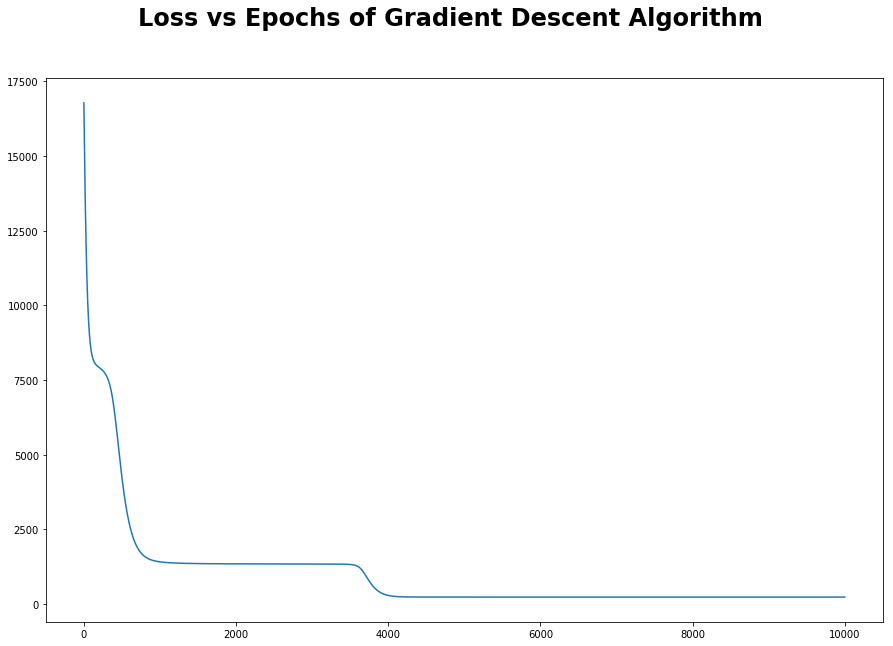

In [429]:
plt.figure(figsize=(15,10))
plt.plot(epoch_loss_df['epoch'],epoch_loss_df['loss'])
plt.suptitle("Loss vs Epochs of Gradient Descent Algorithm",fontweight='bold',fontsize=24)
plt.show()

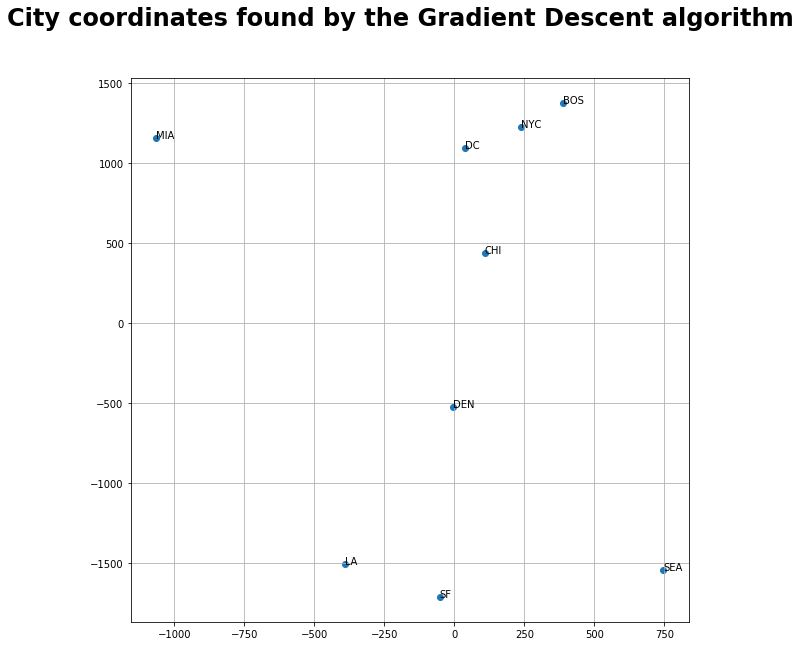

In [430]:
y=X.T[1]
x=X.T[0]

n=['BOS', 'NYC' ,'DC', 'MIA', 'CHI', 'SEA', 'SF' ,'LA' ,'DEN']

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(x, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i],y[i]))
ax.grid()
plt.suptitle("City coordinates found by the Gradient Descent algorithm",fontweight='bold',fontsize = 24)
plt.show()

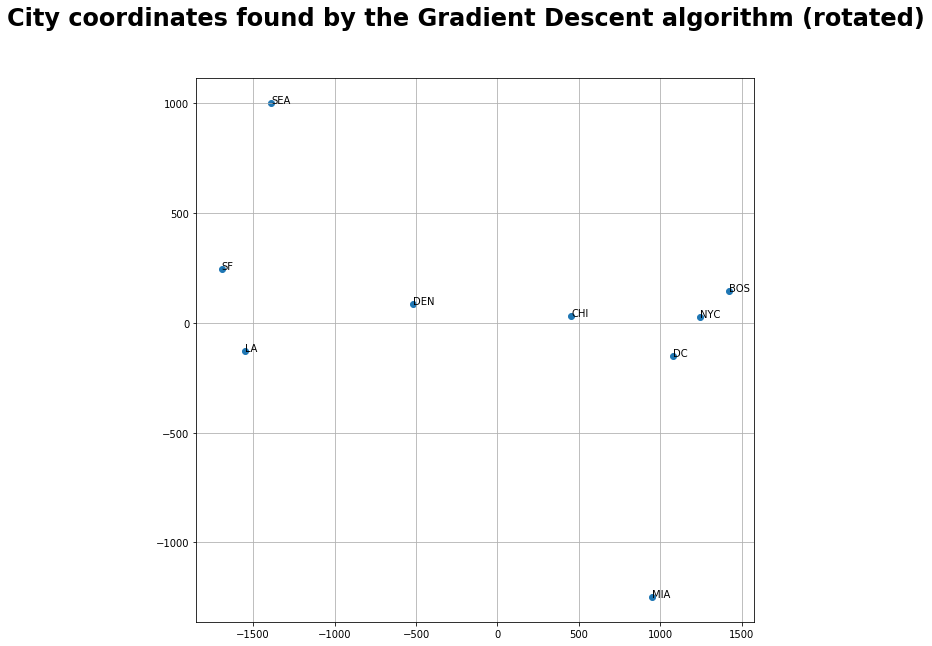

In [414]:
y=X.T[1]
x=X.T[0]

x_t = -X.T[1]
y_t = X.T[0]


n=['BOS', 'NYC' ,'DC', 'MIA', 'CHI', 'SEA', 'SF' ,'LA' ,'DEN']

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(x_t, y_t)

for i, txt in enumerate(n):
    ax.annotate(txt, (x_t[i],y_t[i]))
ax.grid() 
plt.suptitle("City coordinates found by the Gradient Descent algorithm (rotated)",fontweight='bold',fontsize = 24)
plt.show()